# 1. The Dataset

In [3]:
#Para manipular el dataset yapo_losrios.csv desde un dataframe de pandas
import pandas as pd
df_yapo = pd.read_csv('dataset_yapo_losrios_clean.csv')

In [4]:
#Para utilizar una sintaxis SQL para consultar un dataframe (para l@s que les gusta SQL :-) )
from pandasql import sqldf

#Ejemplo:
myQuery="""SELECT * FROM df_yapo LIMIT 5;"""
result=sqldf(myQuery)
result

,Link,Titulo,Descripcion,Tipo,Valor,Fecha,Dormitorios,Baños,Comuna
0,https://www.yapo.cl/los_rios/arrendar/cabana_a...,Cabaña amoblada,"Cabaña amoblada, en sector residencial Parque...",Departamento,180000,5 Diciembre 15:32,1.0,1.0,Valdivia
1,https://www.yapo.cl/los_rios/arrendar/casa_par...,casa para arrendar,Tengo subsidio de arriendo el subsidio es de ...,Casa,230000,5 Diciembre 15:09,3.0,1.0,Valdivia
2,https://www.yapo.cl/los_rios/arrendar/cabana_6...,cabaña,Excelentes y confortables cabañas para arrien...,Departamento,320000,5 Diciembre 15:08,2.0,1.0,Valdivia
3,https://www.yapo.cl/los_rios/arrendar/cabana_6...,cabaña,"Arriendo 2 cabañas, cada una cuenta con 2 dor...",Casa,200000,5 Diciembre 14:26,2.0,1.0,Valdivia
4,https://www.yapo.cl/los_rios/arrendar/arriendo...,Arriendo Departamento Estudio,"Arriendo Departamento Estudio, $ 150.000 mens...",Departamento,150000,5 Diciembre 13:45,1.0,1.0,Valdivia


# 2. Oh, show me the way to the next whisky bar (oh, don't ask why)

In [14]:
#¿Cuál es el valor promedio del arriendo según el tipo de bien inmobiliario?

myQuery="""SELECT Tipo, round(avg(Valor),0) as Precio_Promedio 
FROM df_yapo 
WHERE Tipo NOT LIKE 'Terreno' 
GROUP BY Tipo ORDER BY Precio_Promedio;"""

result=sqldf(myQuery)
result

,Tipo,Precio_Promedio
0,Pieza,130943.0
1,Oficina,255366.0
2,Casa,256576.0
3,Departamento,276860.0
4,"Estacionamiento, bodega u otro",305433.0
5,Comercial e industrial,464335.0


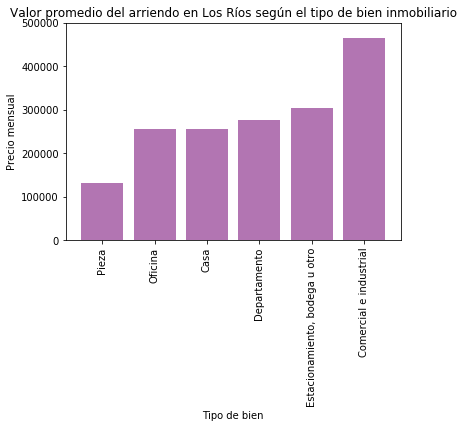

In [15]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
height = result['Precio_Promedio']
bars = result['Tipo']
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Valor promedio del arriendo en Los Ríos según el tipo de bien inmobiliario')
plt.xlabel('Tipo de bien')
plt.ylabel('Precio mensual')
 
# Limits for the Y axis
plt.ylim(0,500000)
 
# Create names
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
#plt.show()

#Save graphic
plt.savefig('plot.png')  

In [16]:
import base64

encoded = base64.b64encode(open("plot.png", "rb").read())
img_base64 = 'data:image/png;base64,' + str(encoded)[2: -1]

In [19]:
import requests
url = 'http://activismo.inf.uach.cl:8080/api/chart/'
myData = {
    "title": "test",
    "image": img_base64,
    "tags":["tag1","tag2"]
}
x = requests.post(url, data = myData)
print(x)

<Response [200]>


## Análisis del texto

In [10]:
import spacy

nlp = spacy.load("es_core_news_md", disable=["parser","ner","textcat","..."])

In [11]:
myQuery="""SELECT Descripcion
FROM df_yapo;"""

results=sqldf(myQuery)
results

,Descripcion
0,"Cabaña amoblada, en sector residencial Parque..."
1,Tengo subsidio de arriendo el subsidio es de ...
2,Excelentes y confortables cabañas para arrien...
3,"Arriendo 2 cabañas, cada una cuenta con 2 dor..."
4,"Arriendo Departamento Estudio, $ 150.000 mens..."
5,Se busca casa en arriendo en sector cercano a...
6,Cabaña tipo departamento completamente equipa...
7,Se arrienda estacionamiento a una cuadra de I...
8,Se arrienda habitación con pension completa ...
9,Cabaña dos pisos con dos dormitorios.uno con ...


In [33]:
texts=""
for result in results["Descripcion"]:
    texts=texts+" "+result

In [38]:
import operator

def word_count(string):
    my_string = string.lower().split()
    my_dict = {}
    for item in my_string:
        if item in my_dict:
            my_dict[item] += 1
        else:
            my_dict[item] = 1
            
            
    ordered_dict = sorted(my_dict.items(), key=operator.itemgetter(1), reverse=True)

    print(ordered_dict)

In [39]:
word_count(texts)

[('de', 2855), ('y', 2015), ('con', 1554), ('a', 1359), ('en', 1332), ('se', 990), ('para', 836), ('la', 691), ('cabaña', 663), ('del', 567), ('arriendo', 566), ('o', 551), ('el', 532), ('2', 491), ('al', 484), ('arrienda', 442), ('por', 442), ('sector', 419), ('dos', 391), ('una', 358), ('1', 352), ('casa', 347), ('cocina', 336), ('mes', 333), ('incluye', 330), ('un', 329), ('que', 323), ('agua', 254), ('3', 233), ('centro', 233), ('baño', 230), (',', 221), ('las', 220), ('dormitorios', 212), ('tv', 211), ('busco', 207), ('departamento', 202), ('no', 201), ('cuenta', 198), ('luz', 188), ('año', 184), ('cable', 183), ('locomoción', 181), ('ubicada', 180), ('amoblada', 180), ('cama', 172), ('es', 169), ('sin', 169), ('gastos', 162), ('pieza', 158), ('persona', 154), ('garantía', 154), ('estacionamiento', 154), ('los', 153), ('personas', 152), ('cerca', 149), ('dormitorios,', 148), ('valor', 145), ('comedor', 133), ('agua,', 130), ('living', 128), ('minutos', 125), ('calle', 124), ('llam

# ¿Cuántos anuncios hay por barrios?

In [100]:
list_barrios = ["centro","regional","hospital","costanera","picarte","niebla","bosque","francia","krahmer","teja","ánimas","corvi","copihues","collico","maitenes","bajos","bueras"]

In [101]:
def lowerWords(sentences):
    return(sentences.lower())

In [102]:
df_yapo["Descripcion"]=df_yapo.Descripcion.apply(lowerWords)

In [103]:
df_yapo["barrio"]=0

In [108]:
def setBarrio(sentences):
    listofBarrios=["regional","hospital","costanera","picarte","windsor","líder","miraflores","inacap","sodimac",
                   "coliseo","terminal","saval","torobayo","punucapa","angachilla",
                   "niebla","bosque","francia","krahmer","teja","ánimas","corvi","copihues","collico","maitenes"]
    for barrio in listofBarrios:
        if barrio in sentences:
            return barrio
    
    return 0

In [109]:
df_yapo["Barrios"]=df_yapo.Descripcion.apply(setBarrio)

In [114]:
myQuery="""SELECT Barrios, round(avg(Valor),0) as Precio_Promedio, count(*) as nb_anuncio, Tipo FROM df_yapo WHERE Barrios != 0 AND Valor >= 100000 AND Tipo="Casa" GROUP BY Barrios, Tipo
ORDER BY Precio_Promedio DESC;
"""
result=sqldf(myQuery)
result

,Barrios,Precio_Promedio,nb_anuncio,Tipo
0,picarte,1100000.0,4,Comercial e industrial
1,picarte,1000000.0,1,Terreno
2,picarte,950000.0,1,"Estacionamiento, bodega u otro"
3,windsor,700000.0,3,Casa
4,torobayo,540000.0,3,Casa
5,saval,526667.0,3,Departamento
6,picarte,448949.0,3,Oficina
7,hospital,430693.0,2,Oficina
8,costanera,400000.0,3,Oficina
9,maitenes,400000.0,3,Casa


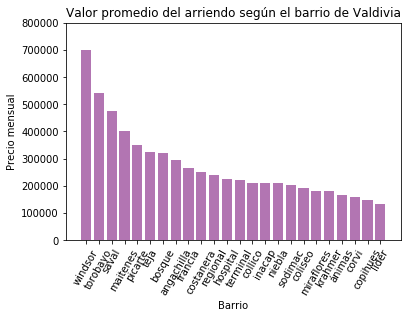

In [111]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
height = result['Precio_Promedio']
bars = result['Barrios']
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Valor promedio del arriendo según el barrio de Valdivia')
plt.xlabel('Barrio')
plt.ylabel('Precio mensual')
 
# Limits for the Y axis
plt.ylim(0,800000)
 
# Create names
plt.xticks(y_pos, bars, rotation=60)
 
# Show graphic
#plt.show()

#Save graphic
plt.savefig('plot2.png')  

In [112]:
import base64

encoded = base64.b64encode(open("plot2.png", "rb").read())
img_base64 = 'data:image/png;base64,' + str(encoded)[2: -1]

In [113]:
import requests
url = 'http://activismo.inf.uach.cl:8080/api/chart/'
myData = {
    "title": "test",
    "image": img_base64,
    "tags":["tag1","tag2"]
}
x = requests.post(url, data = myData)
print(x)

<Response [200]>
